In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# credit for idw functions: https://gist.github.com/Majramos/5e8985adc467b80cccb0cc22d140634e

In [ ]:
df = pd.read_pickle('./data/data.pkl')

In [31]:
temperatures = [df[i]["Temperature"] for i in range(10)]
temperatures = np.array(temperatures)

In [32]:
lat = np.array([df[i]["Latitude"] for i in range(10)])
long = np.array([df[i]["Longitude"] for i in range(10)])

In [43]:
x,y,z = (temperatures[:,0:1], lat[:,0:1], long[:,0:1])
x,y,z = x.flatten(), y.flatten(), z.flatten()

In [44]:
# size of the grid to interpolate
nx, ny = 50, 50 

# generate two arrays of evenly space data between ends of previous arrays
xi = np.linspace(x.min(), x.max(), nx)
yi = np.linspace(y.min(), y.max(), ny)

# generate grid 
xi, yi = np.meshgrid(xi, yi)

# colapse grid into 1D
xi, yi = xi.flatten(), yi.flatten()

In [45]:
def distance_matrix(x0, y0, x1, y1):
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])
    
    # calculate hypotenuse
    return np.hypot(d0, d1)

In [46]:
def simple_idw(x, y, z, xi, yi, power=1):
    dist = distance_matrix(x,y, xi,yi)

    # In IDW, weights are 1 / distance
    weights = 1.0/(dist+1e-12)**power

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

In [47]:
def plot(x,y,z,grid):
    plt.figure(figsize=(15,10))
    plt.imshow(grid, extent=(x.min(), x.max(), y.max(), y.min()), cmap='rainbow', interpolation='gaussian')
    plt.scatter(x,y,c=z, cmap='rainbow', edgecolors='black')
    plt.colorbar()

In [52]:
 # Calculate IDW
grid1 = simple_idw(x,y,z,xi,yi, power=2)
grid1 = grid1.reshape((ny, nx))

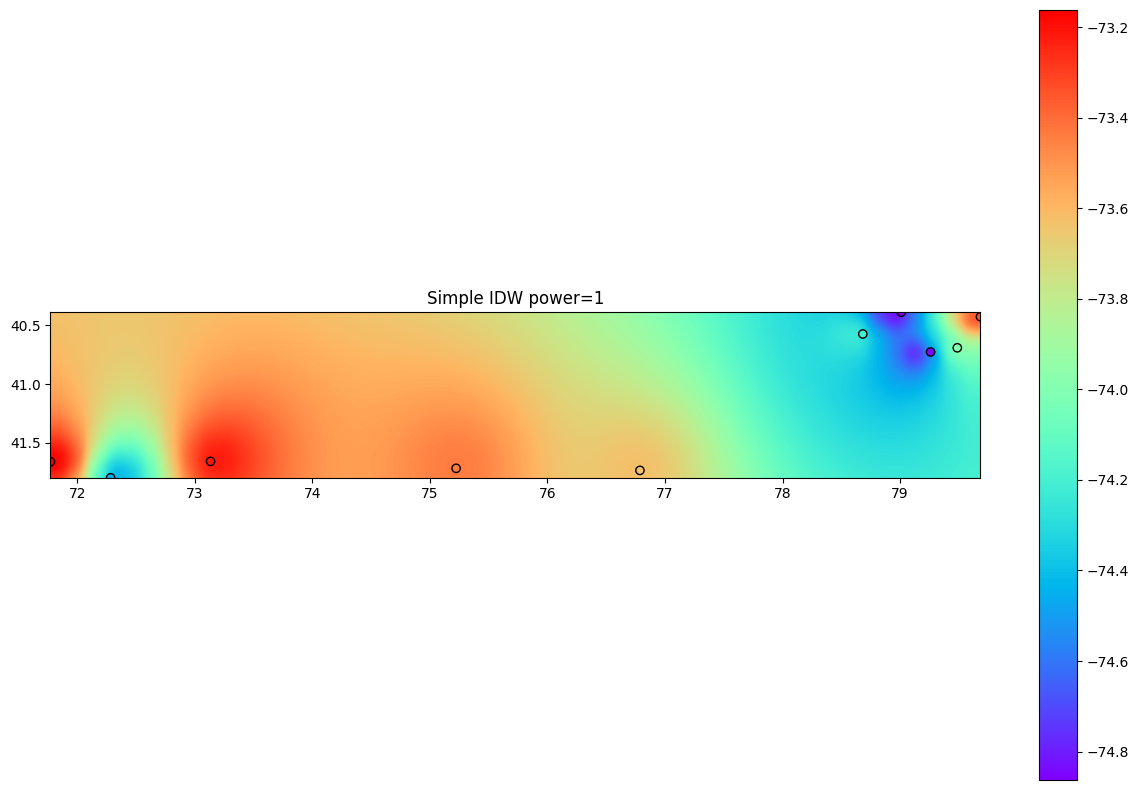

In [53]:
plot(x,y,z,grid1)
plt.title('Simple IDW power=1')
plt.show()